# TRAFFIC SIGNS CLASSIFICATION
project by:
>J. SUJAN CHOWDARY - 20BCI7294
>>K. RUPASREE       - 20BCI7108

## Installing tensorflow 

In [1]:
!pip install tensorflow

## Installing cv2

In [2]:
!pip install opencv-python

## Import required libraries

In [3]:
#importing necessary libraries.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Store data, labels in the list
cell for importing all the images of various traffic signs.

In [4]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()
print(cur_path)

C:\Users\j sujan chowdary


## Preprocess the images


In [7]:
import os
data = []
labels = []
classes = 43
cur_path = os.getcwd()
print(cur_path)
#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,r'D:\trafficsign\Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

C:\Users\j sujan chowdary


## Converting lists into numpy arrays

In [8]:
data = np.array(data)
labels = np.array(labels)

## Splitting training and testing dataset

In [9]:
print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

(39209, 30, 30, 3) (39209,)


## Converting the labels into one hot encoding

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Building the model

In [11]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

## Compilation of the model

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/20
981/981 [==============================] - 54s 54ms/step - loss: 1.7362 - accuracy: 0.5544 - val_loss: 0.2521 - val_accuracy: 0.9373
Epoch 2/20
981/981 [==============================] - 56s 57ms/step - loss: 0.4643 - accuracy: 0.8690 - val_loss: 0.1747 - val_accuracy: 0.9592
Epoch 3/20
981/981 [==============================] - 59s 60ms/step - loss: 0.2904 - accuracy: 0.9216 - val_loss: 0.0900 - val_accuracy: 0.9768
Epoch 4/20
981/981 [==============================] - 58s 60ms/step - loss: 0.2628 - accuracy: 0.9293 - val_loss: 0.1148 - val_accuracy: 0.9722
Epoch 5/20
981/981 [==============================] - 61s 62ms/step - loss: 0.2380 - accuracy: 0.9365 - val_loss: 0.0548 - val_accuracy: 0.9862
Epoch 6/20
981/981 [==============================] - 62s 63ms/step - loss: 0.2369 - accuracy: 0.9372 - val_loss: 0.0648 - val_accuracy: 0.9860
Epoch 7/20
981/981 [==============================] - 61s 63ms/step - loss: 0.2100 - accuracy: 0.9468 - val_loss: 0.0401 - val_accuracy:

## Accuracy

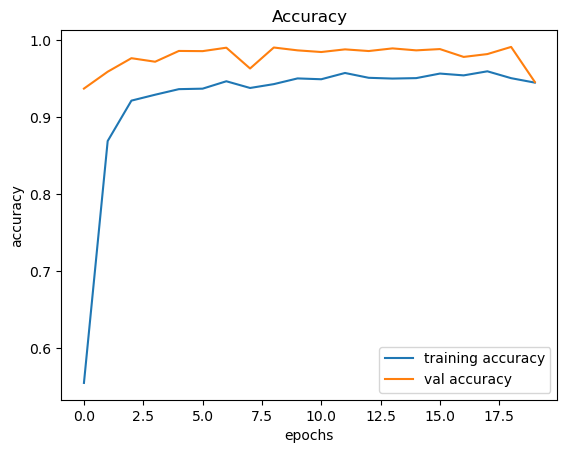

In [14]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Loss 

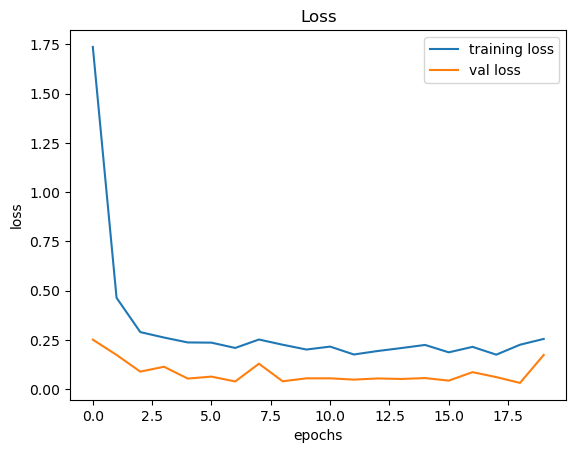

In [15]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## testing on Test data

In [16]:
model.save('traffic_classifier1.h5')